# Bike Rental Prediction

In [ ]:
#First, let's import the nesseacary labraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [ ]:
df=pd.read_csv("Bike Rental UCI dataset.csv")
print ('the data frame has a shape :', df.shape)
print ('let\'s print the first five rows \n', df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Assignment_2_correction.ipynb	 Bike_Rental_Starter.ipynb
 Assignment_2_data_cleaned.csv	'Bike Rental UCI dataset.csv'
 Assignment_2_data.csv		 Gradient_Descent_animation.ipynb
 Assignment_2.ipynb		 gradient_descent.gif
the data frame has a shape : (17379, 13)
let's print the first five rows 
    season  yr  mnth  hr  holiday  ...   hum  windspeed  dayOfWeek  days  demand
0       1   0     1   0        0  ...  0.81        0.0        Sat     0      16
1       1   0     1   1        0  ...  0.80        0.0        Sat     0      40
2       1   0     1   2        0  ...  0.80        0.0        Sat     0      32
3       1   0     1   3        0  ...  0.75        0.0        Sat     0      13
4       1   0     1   4        0  ...  0.75        0.0        Sat     0       1

[5 rows x 13 columns]


In [ ]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   hum         17379 non-null  float64
 9   windspeed   17379 non-null  float64
 10  dayOfWeek   17379 non-null  object 
 11  days        17379 non-null  int64  
 12  demand      17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB
None
             season            yr  ...          days        demand
count  17379.000000  17379.000000  ...  17379.000000  17379.000000
mean       2.501640      0.502561  ...    361.562576    189.463088
std     

Looks like the dataframe has 17379 rows and 13 columns. There is one columns of type object (text) <br>
temp, hum, windspeed are rescaled to 0-1 range

## 2. Visualize the data

'Done'

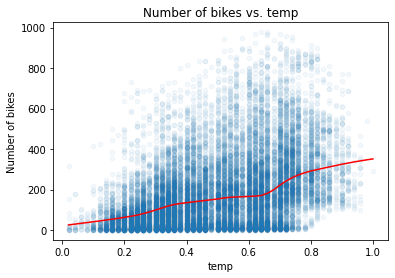

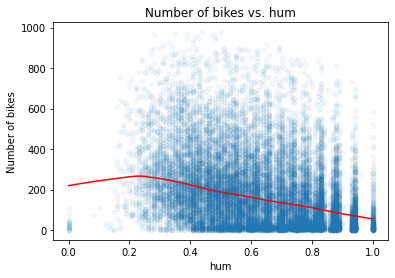

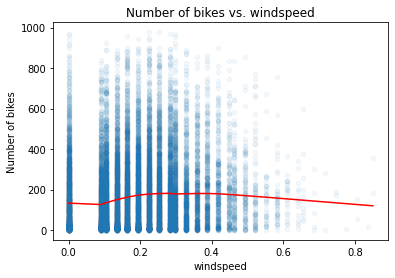

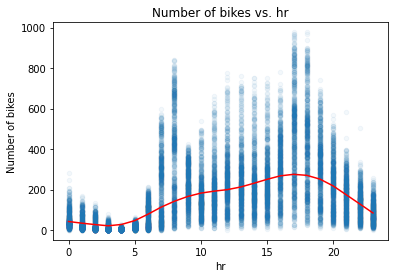

In [ ]:
# make sure that the visualizations are printed in the notebook
%matplotlib inline   

def bike_scatter(df, cols):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    
    ## Loop over the columns and create the scatter plots
    for col in cols:
        ## first compute a lowess fit to the data
        los = lw.lowess(df['demand'], df[col], frac = 0.3)

        ## Now make the plots
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df.plot(kind = 'scatter', x = col, y = 'demand', ax = ax, alpha = 0.05)
        plt.plot(los[:, 0], los[:, 1], axes = ax, color = 'red')
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'

num_cols = ["temp", "hum", "windspeed", "hr"] 
bike_scatter(df, num_cols)

AssertionError: ignored

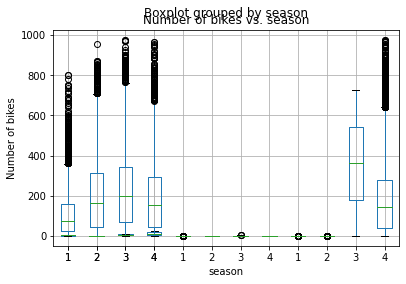

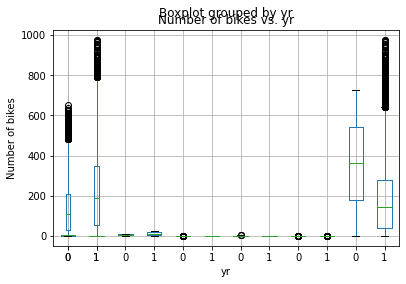

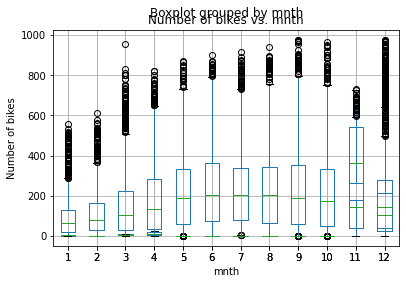

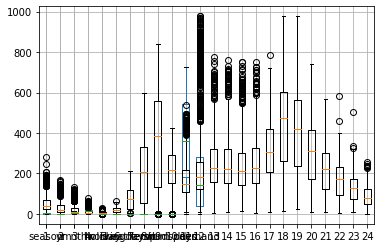

In [ ]:
def bike_box(df, cols):
    import matplotlib.pyplot as plt
    
    ## Loop over the columns and create the box plots
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df.boxplot()
        df.boxplot(column = 'demand', by = col, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday','workingday', 'weathersit', 'dayOfWeek']
bike_box(df, cat_cols)

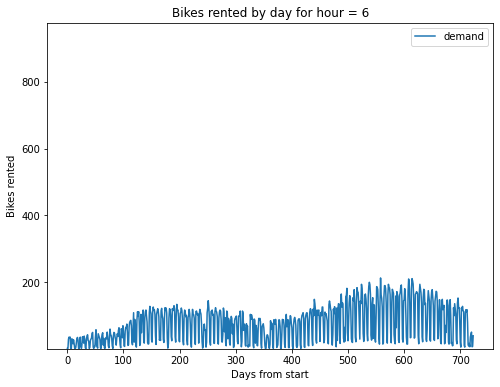

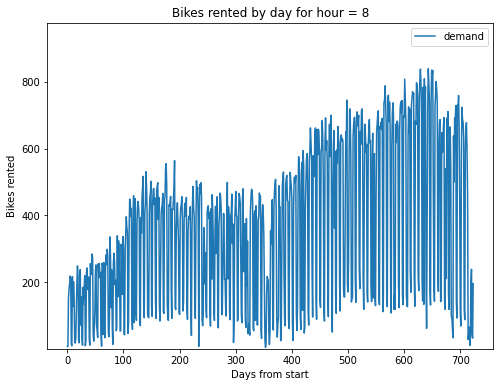

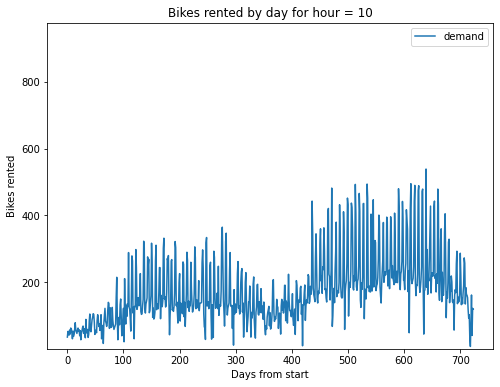

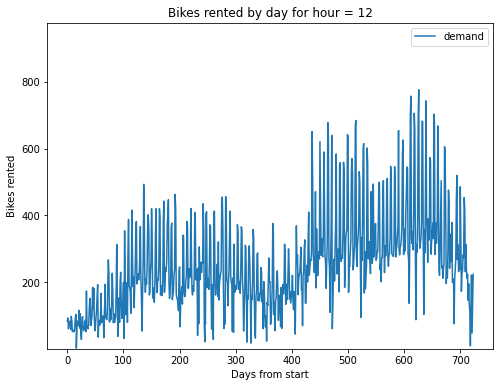

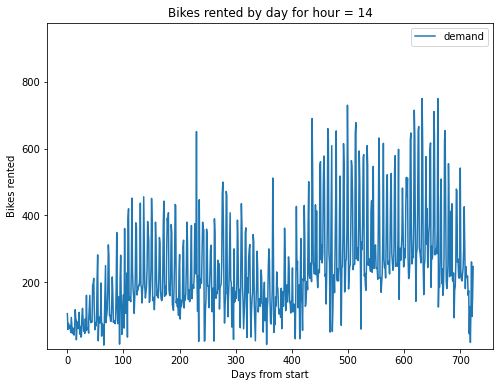

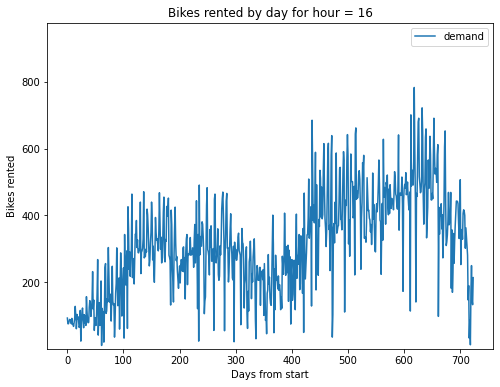

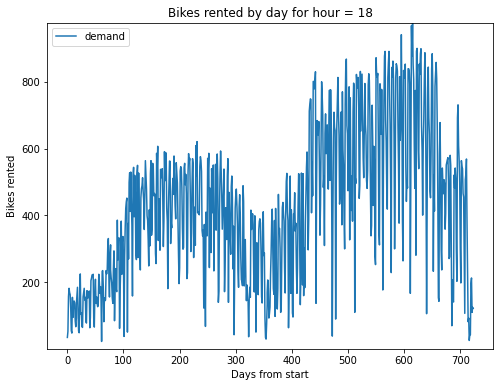

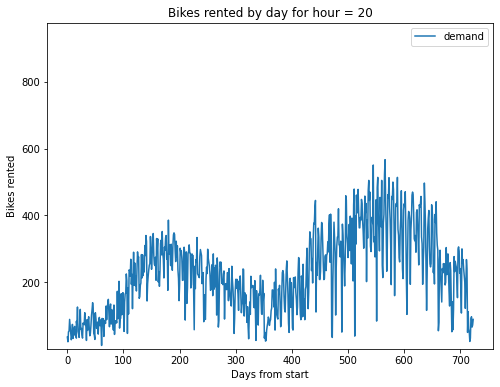

In [ ]:
def bike_series(df, tms):
    import matplotlib.pyplot as plt
        
    lims = (min(df.demand), max(df.demand))   
    for t in tms:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == t].plot(kind = 'line', x = 'days', y = 'demand',
                            ylim = lims, ax = ax)    
        plt.xlabel("Days from start")
        plt.ylabel("Bikes rented")
        plt.title("Bikes rented by day for hour = " + str(t))
    return 'Done'
plt_times = [6, 8, 10, 12, 14, 16, 18, 20]
bike_series(df, plt_times)

'Done'

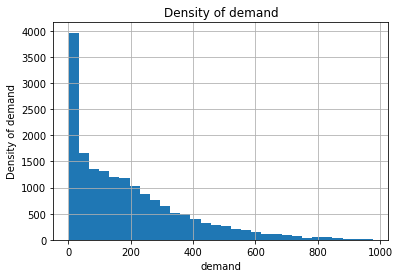

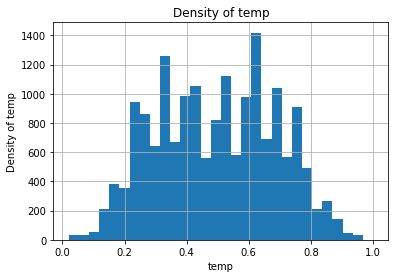

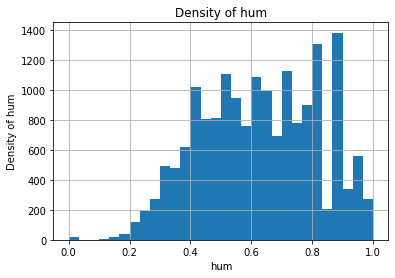

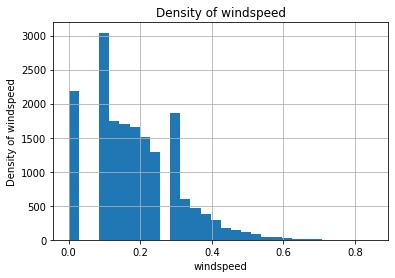

In [ ]:
def bike_hist(df, cols):    
    import matplotlib.pyplot as plt
    
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    
    return 'Done'
hist_cols = ["demand", "temp", "hum", "windspeed"]
bike_hist(df, hist_cols)

## 3. Building the Model

In [ ]:
from sklearn.model_selection import train_test_split
y = df['demand']
X = df.drop('demand', axis=1)

X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes # convert categorical into numerical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print ("the max day in X_train is : {}".format(np.max(df.loc[:,'days'])))

print(X_train.shape)

the max day in X_train is : 724
(12165, 12)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score =',  test_score)

train score = 0.38165293360757513
test score = 0.3992205859241196


Looks like the model is not fitting well the data, since R2 is small. 
There might also be a sign of overfitting since there is a little difference between training and test r-square.

## 4. Visualize the model's performance

'Done'

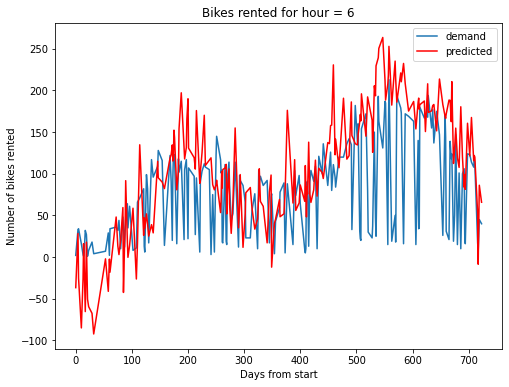

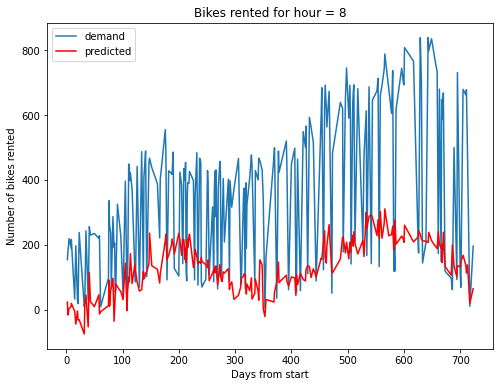

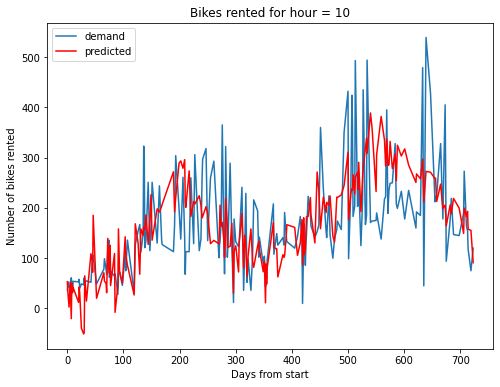

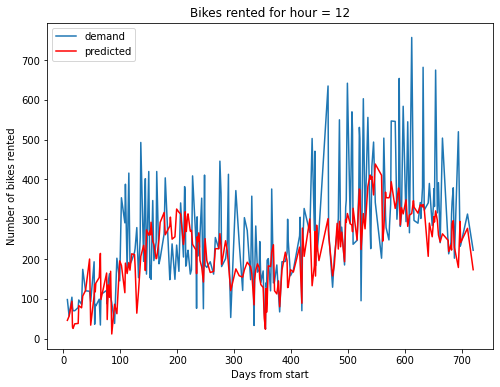

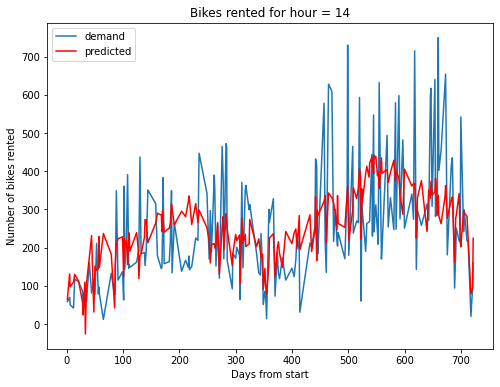

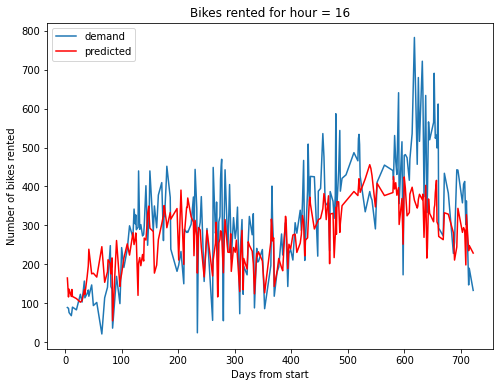

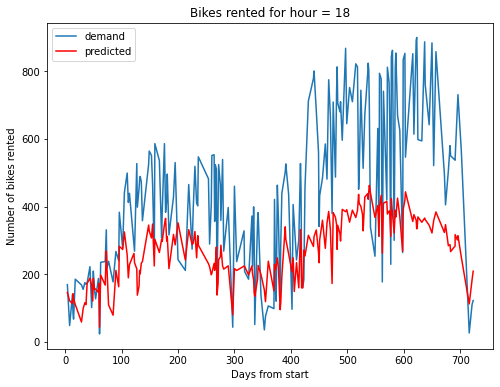

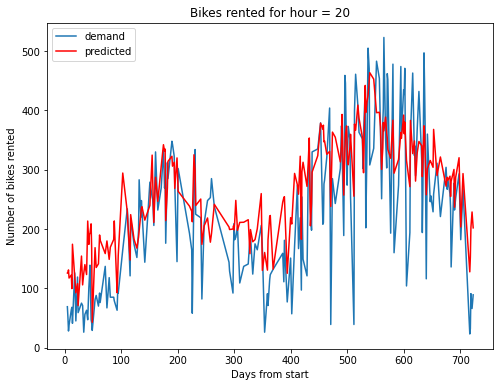

In [ ]:
def ts_bikes(df, times):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    for tm in times:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'demand', ax = ax)          
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'predicted', color = 'red', ax = ax)                                    
        plt.xlabel("Days from start")
        plt.ylabel("Number of bikes rented")
        plt.title("Bikes rented for hour = " + str(tm))
        #fig.savefig('ts_' + str(tm) + '.png')
    return 'Done'

X_test['predicted']=y_pred
X_test['demand']=y_test
X_test.sort_values('days',inplace=True)
ts_bikes(X_test, plt_times)

Looks like the model is not doing a great job in fitting the demand for hours 8 and 18. Let's plot the reisuals for all hours

'Done'

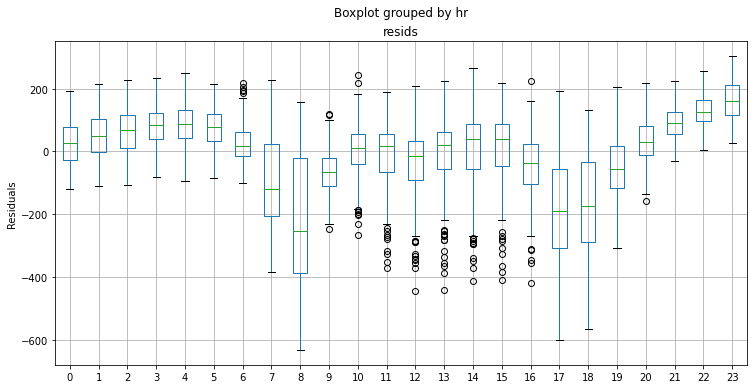

In [ ]:
def resids(df):
    df['resids'] = df.predicted - df.demand
    return df        
        
def box_resids(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    
    df = resids(df)
    
    fig = plt.figure(figsize=(12, 6))
    fig.clf()
    ax = fig.gca()  
    df.boxplot(column = ['resids'], by = ['hr'], ax = ax)   
    plt.xlabel('')
    plt.ylabel('Residuals')
    fig.savefig('boxes' + '.png')
    return 'Done'
box_resids(X_test)

for hours 7,8, 17, 18 most of the residuals are negative, so our model is under-predecting the demand

Plot the histogram of residuals. A good model has residuals centered around zero

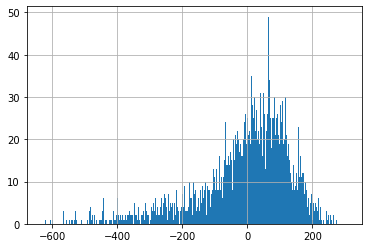

In [ ]:
resids(X_test)['resids'].hist(bins=700)

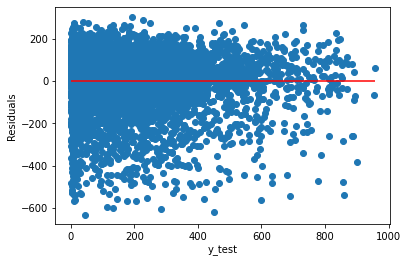

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, resids(X_test)['resids'])
plt.hlines(y=0, xmin=0,xmax=y_test.max(), color='r')
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.show()

As we've seen before, there might be a sign of overfitting, so regularization might help improving the model's performance on test set. We might want to improve the model with a Ridge or a Lasso  regularization model.